<a href="https://colab.research.google.com/github/edilmita/edilmita/blob/main/Assigment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
 

NameError: ignored

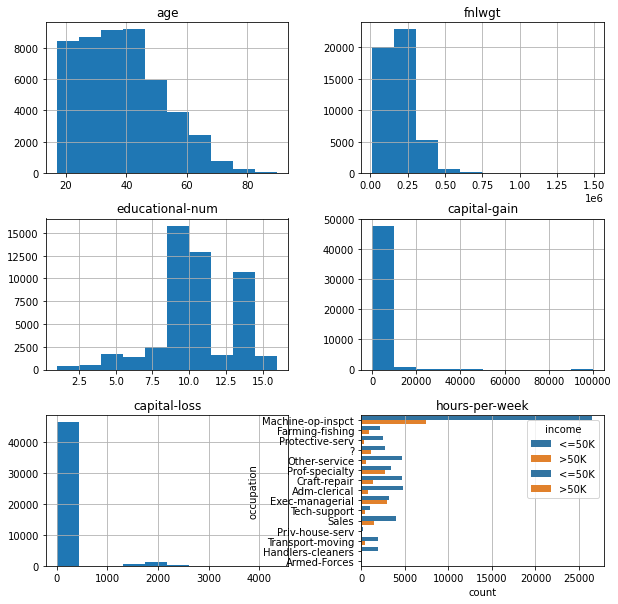

In [ ]:
from sklearn.utils.validation import column_or_1d
#@title Default title text
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import os
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline

adult = pd.read_csv('/content/adult-original.csv')
adult.head()

#1	38	Private	89814	HS-grad	9	Married-civ-spouse	Farming-fishing	Husband	White	Male	0	0	50	United-States	<=50K
#2	28	Local-gov	336951	Assoc-acdm	12	Married-civ-spouse	Protective-serv	Husband	White	Male	0	0	40	United-States	>50K
#3	44	Private	160323	Some-college	10	Married-civ-spouse	Machine-op-inspct	Husband	Black	Male	7688	0	40	United-States	>50K
#4	18	?	103497	Some-college	10	Never-married	?	Own-child	White	Female	0	0	30	United-States	<=50K

#Then, we will look at the information. This is an essential step earlier than getting to develop the prototype.
#Examining Data Laboratory assessment


adult.info()

#Remarks
##•	Here are 25000 samples in the Adult dataset
##•	Around are both categorical and numerical columns in the dataset
##•	There are no missing values

#Management Numerical Columns

num_attributes = adult.select_dtypes(include=['int64'])
print(num_attributes.columns)

#Statistics Visualizations

num_attributes.hist(figsize=(10,10))

adult.describe()

#Interpretations

#The standards are on various measures. Various machine learning prototypes need the standards to be on an equal scale. We will utilize StandardScaler after the sklearn library to level the elements.
#Control Definite Columns

cat_attributes = adult.select_dtypes(include=['object'])
print(cat_attributes.columns)

#Data Visualization

sns.countplot(y='workclass', hue='income', data = cat_attributes)

sns.countplot(y='occupation', hue='income', data = cat_attributes)

class ColumnsSelector(BaseEstimator, TransformerMixin):
  
  def __init__(self, type):
    self.type = type
  
  def fit(self, X, y=None):
    return self
  
  def transform(self,X):
    return X.select_dtypes(include=[self.type])

#Creating Pipelines
#Numerical Data Pipeline

num_pipeline = Pipeline(steps=[
    ("num_attr_selector", ColumnsSelector(type='int')),
    ("scaler", StandardScaler())
])


#split the data into train and test set


train, test = train_test_split(adult, test_size=0.2, random_state=42, shuffle=True)

#Training the model

#We will create a copy of the training dataset and separate the feature vectors and the target values.

train_copy = train.copy()
X_train = train_copy.drop('income', axis =1)
Y_train = train_copy['income']

X_train = X_train[['age', 'educational-num', 'hours-per-week']]
X_train.columns
X_train_processed=full_pipeline.fit_transform(X_train)
model = LogisticRegression(random_state=0)
model.fit(X_train_processed, Y_train)


#Testing the model

test_copy = test.copy()
X_test = test_copy.drop('income', axis =1)
X_test = X_test[['age', 'educational-num', 'hours-per-week']]
Y_test = test_copy['income']
X_test_processed = full_pipeline.fit_transform(X_test)
predicted_classes = model.predict(X_test_processed)

#Model Evaluation

accuracy_score(predicted_classes, Y_test.values)
